<a href="https://colab.research.google.com/github/Reddysaikowshik/Lab-03.1/blob/main/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/titanic.csv')
summary = data.describe()

In [15]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset("titanic")

titanic = pd.get_dummies(titanic, drop_first=True)

titanic.dropna(inplace=True)

print(titanic.head())

   survived  pclass   age  sibsp  parch     fare  adult_male  alone  sex_male  \
0         0       3  22.0      1      0   7.2500        True  False      True   
1         1       1  38.0      1      0  71.2833       False  False     False   
2         1       3  26.0      0      0   7.9250       False   True     False   
3         1       1  35.0      1      0  53.1000       False  False     False   
4         0       3  35.0      0      0   8.0500        True   True      True   

   embarked_Q  ...  who_woman  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  \
0       False  ...      False   False   False   False   False   False   False   
1       False  ...       True   False    True   False   False   False   False   
2       False  ...       True   False   False   False   False   False   False   
3       False  ...       True   False    True   False   False   False   False   
4       False  ...      False   False   False   False   False   False   False   

   embark_town_Queenstown 

In [16]:
from sklearn.datasets import fetch_openml

titanic = fetch_openml("titanic", version=1, as_frame=True)
df = titanic.frame
print(df.head())

   pclass survived                                             name     sex  \
0       1        1                    Allen, Miss. Elisabeth Walton  female   
1       1        1                   Allison, Master. Hudson Trevor    male   
2       1        0                     Allison, Miss. Helen Loraine  female   
3       1        0             Allison, Mr. Hudson Joshua Creighton    male   
4       1        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis,

In [18]:
titanic = sns.load_dataset("titanic")

titanic.dropna(inplace=True)

titanic = pd.get_dummies(titanic, drop_first=True)

X = titanic.drop(columns=["survived"])
y = titanic["survived"]

print(X.head())
print(y.head())

    pclass   age  sibsp  parch     fare  adult_male  alone  sex_male  \
1        1  38.0      1      0  71.2833       False  False     False   
3        1  35.0      1      0  53.1000       False  False     False   
6        1  54.0      0      0  51.8625        True   True      True   
10       3   4.0      1      1  16.7000       False  False     False   
11       1  58.0      0      0  26.5500       False   True     False   

    embarked_Q  embarked_S  ...  who_woman  deck_B  deck_C  deck_D  deck_E  \
1        False       False  ...       True   False    True   False   False   
3        False        True  ...       True   False    True   False   False   
6        False        True  ...      False   False   False   False    True   
10       False        True  ...      False   False   False   False   False   
11       False        True  ...       True   False    True   False   False   

    deck_F  deck_G  embark_town_Queenstown  embark_town_Southampton  alive_yes  
1    False   Fals

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

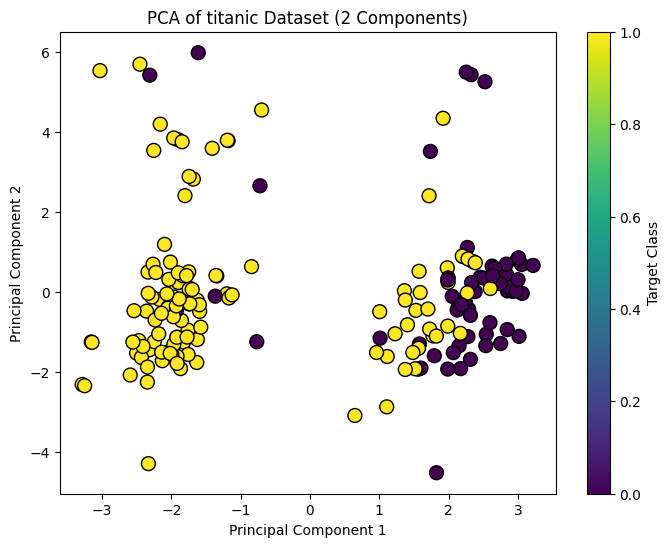

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of titanic Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class')
plt.show()

In [22]:
print("Explained Variance Ratio of Each Component:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio of Each Component:
[0.19392628 0.15145598]


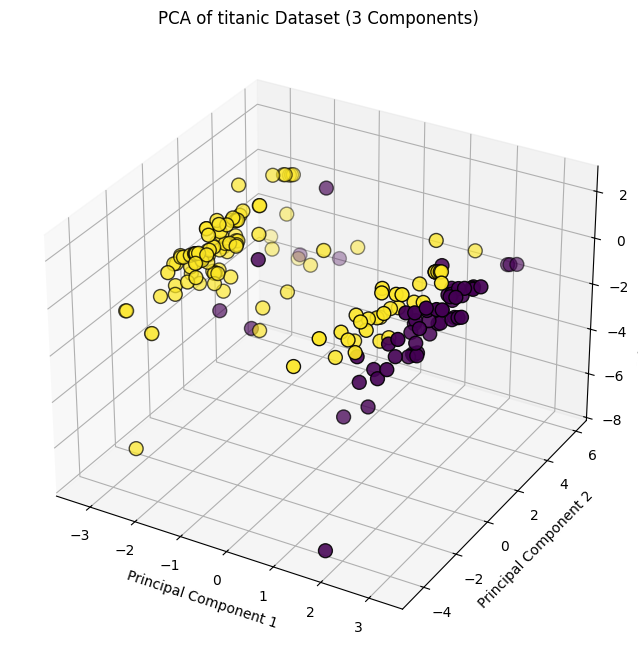

In [24]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
# 3D visualization using matplotlib
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', edgecolor='k', s=100)
ax.set_title('PCA of titanic Dataset (3 Components)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()